<a href="https://colab.research.google.com/github/Cal-Poly-Data-301/test-assignment-arnenoori/blob/main/DATA_301_Lab_1A_Arne_Noori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

**EXPLANATION:**

1. I've heard of Benford's Law before, so I suspect that there will be more values as the first digit than the last digit of 9. There should be roughly 30% of values with the first digit of 1 with only about 5% with the first digit of 9
2. I don't believe that Benford's Law effects the last digit so it both the value of 1 & the last digit of 9 should be roughly 10%.

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file (https://dlsun.github.io/pods/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [ ]:
import pandas as pd

df = pd.read_csv("https://dlsun.github.io/pods/data/sp500.csv")
df.set_index("date", inplace=True)
print(df)

            Name     open    close    volume
date                                        
2018-02-01   AAL   $54.00   $53.88   3623078
2018-02-01  AAPL  $167.16  $167.78  47230787
2018-02-01   AAP  $116.24  $117.29    760629
2018-02-01  ABBV  $112.24  $116.34   9943452
2018-02-01   ABC   $97.74   $99.29   2786798
...          ...      ...      ...       ...
2018-02-01   XYL   $72.50   $74.84   1817612
2018-02-01   YUM   $84.24   $83.98   1685275
2018-02-01   ZBH  $126.35  $128.19   1756300
2018-02-01  ZION   $53.79   $54.98   3542047
2018-02-01   ZTS   $76.84   $77.82   2982259

[505 rows x 4 columns]


**EXPLANATION:**

We are observing the individual cost of the stocks on the S&P 500 on Feb 1, 2018. The variable "date" is the natural variable we can use as the index.

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

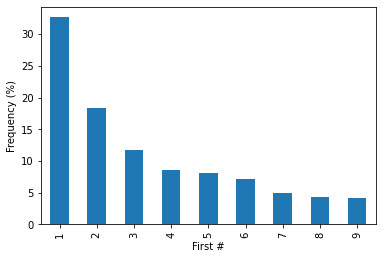

In [ ]:
import matplotlib.pyplot as plt

df["firstdigit"] = df["volume"].astype(str).str[0]

# Bar plot would be effective here
plt.figure()
(df["firstdigit"].value_counts(normalize=True)*100).sort_index().plot(kind='bar') # by frequency
plt.xlabel("First #")
plt.ylabel("Frequency (%)")
plt.show()

**EXPLANATION:**

While I initially thought the data might be quantitative since we're dealing with numbers. It is actually categorical as we are dealing with the categories 1,2,3,4,5,6,7,8,9. As we're seeking to see the frequency of the first number within the dataset.
The barchart breaks down the frequency by percentage.

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

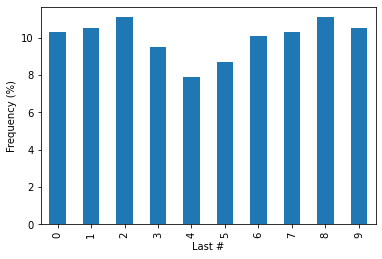

In [ ]:
df["lastdigit"] = df["volume"].astype(str).str[-1]

plt.figure()
(df["lastdigit"].value_counts(normalize=True)*100).sort_index().plot(kind='bar') # by frequency
plt.xlabel("Last #")
plt.ylabel("Frequency (%)")
plt.show()

**EXPLANATION:**

Basically same explanation as the previous question with but [-1] of the index goes to the last point in the string. I find it interesting that our prediction is fairly spot on but the middle digits 4 & 5 have slightly less percentage points less than 2 & 8.

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

In [1]:
df['close'] = df['close'].apply(lambda x: x.replace('$',''))
df["firstdigit1"] = df["close"].astype(str).str[0]

plt.figure()
(df["firstdigit1"].value_counts(normalize=True)*100).sort_index().plot(kind='bar') # by frequency
plt.xlabel("First #")
plt.ylabel("Frequency (%)")
plt.show()

NameError: ignored

**EXPLANATION:**

The data we get out of this graph isn't that useful in finding parterns within the stock price besdies that a majority of stocks arewithin the $100 range.